In [4]:
# Import necessary libraries
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Looksorpersonality.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

  Gender  att_high  av_high  ug_high  att_some  av_some  ug_some  att_none  \
0   Male      86.0     84.0     67.0      88.0     69.0     50.0      97.0   
1   Male      91.0     83.0     53.0      83.0     74.0     48.0      86.0   
2   Male      89.0     88.0     48.0      99.0     70.0     48.0      90.0   
3   Male      89.0     69.0     58.0      86.0     77.0     40.0      87.0   
4   Male      80.0     81.0     57.0      88.0     71.0     50.0      82.0   

   av_none  ug_none  
0     48.0     47.0  
1     50.0     46.0  
2     45.0     48.0  
3     47.0     53.0  
4     50.0     45.0  


                                         sum_sq     df           F  \
C(Gender)                              0.200000    1.0    0.006599   
C(Looks)                           20779.633333    2.0  342.828397   
C(Personality)                     23233.600000    2.0  383.314649   
C(Gender):C(Looks)                  3944.100000    2.0   65.070902   
C(Gender):C(Personality)            4420.133333    2.0   72.924637   
C(Looks):C(Personality)             4055.266667    4.0   33.452481   
C(Gender):C(Looks):C(Personality)   2669.666667    4.0   22.022466   
Residual                            4909.600000  162.0         NaN   

                                         PR(>F)  
C(Gender)                          9.353544e-01  
C(Looks)                           6.093858e-59  
C(Personality)                     3.762559e-62  
C(Gender):C(Looks)                 1.809781e-21  
C(Gender):C(Personality)           2.602120e-23  
C(Looks):C(Personality)            2.479356e-20  
C(Gender):C(Looks):

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#4c72b0'` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#4c72b0'` for the same effect.

  func(*plot_args, **plot_kwargs)


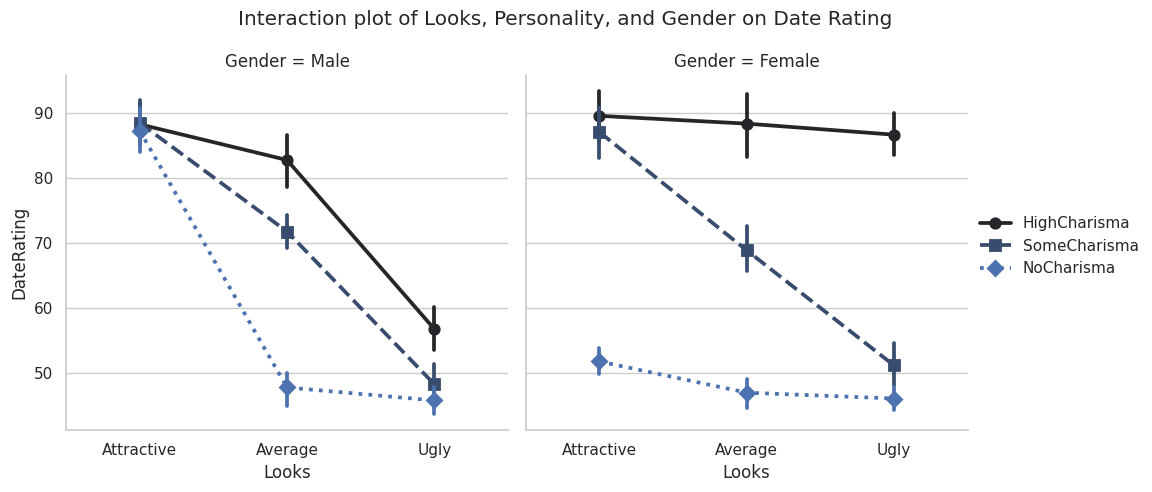

In [9]:
# Reshape the data into long format
df_long = pd.melt(df, id_vars=['Gender'],
                  value_vars=['att_high', 'av_high', 'ug_high',
                              'att_some', 'av_some', 'ug_some',
                              'att_none', 'av_none', 'ug_none'],
                  var_name='Condition', value_name='DateRating')

# Split 'Condition' into 'Looks' and 'Personality'
df_long['Looks'] = df_long['Condition'].apply(lambda x: x.split('_')[0])
df_long['Personality'] = df_long['Condition'].apply(lambda x: x.split('_')[1])

# Map 'Looks' and 'Personality' to more descriptive names
df_long['Looks'] = df_long['Looks'].map({'att': 'Attractive', 'av': 'Average', 'ug': 'Ugly'})
df_long['Personality'] = df_long['Personality'].map({'high': 'HighCharisma', 'some': 'SomeCharisma', 'none': 'NoCharisma'})

# Define the correct order for categorical variables
looks_order = ['Attractive', 'Average', 'Ugly']
personality_order = ['HighCharisma', 'SomeCharisma', 'NoCharisma']

# Perform Mixed-design ANOVA
# Set up the formula for the ANOVA
formula = 'DateRating ~ C(Gender) * C(Looks) * C(Personality)'

# Fit the model using OLS (Ordinary Least Squares)
model = ols(formula, data=df_long).fit()

# Perform ANOVA using type 2 sum of squares
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print(anova_table)

# Check if there is a three-way interaction
interaction_p_value = anova_table.loc['C(Gender):C(Looks):C(Personality)', 'PR(>F)']
if interaction_p_value < 0.05:
    print("There is a significant three-way interaction between Gender, Looks, and Personality.")
else:
    print("There is no significant three-way interaction.")

# Plotting the interaction with FacetGrid
sns.set(style="whitegrid")

# Create a FacetGrid to plot by 'Gender'
g = sns.FacetGrid(df_long, col='Gender', height=5, aspect=1)
g.map(sns.pointplot, 'Looks', 'DateRating', 'Personality',
      order=looks_order, hue_order=personality_order,
      markers=['o', 's', 'D'], linestyles=['-', '--', ':'])

# Set titles and labels
g.add_legend()
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Interaction plot of Looks, Personality, and Gender on Date Rating")
plt.show()